In [116]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [117]:
data= sns.load_dataset('car_crashes')

In [118]:
print(data.head())

print(data.describe())

print(data.info())

   total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   
3   22.4     4.032    5.824          21.056       21.280       827.34   
4   12.0     4.200    3.360          10.920       10.680       878.41   

   ins_losses abbrev  
0      145.08     AL  
1      133.93     AK  
2      110.35     AZ  
3      142.39     AR  
4      165.63     CA  
           total   speeding    alcohol  not_distracted  no_previous  \
count  51.000000  51.000000  51.000000       51.000000    51.000000   
mean   15.790196   4.998196   4.886784       13.573176    14.004882   
std     4.122002   2.017747   1.729133        4.508977     3.764672   
min     5.900000   1.792000   1.593000        1.760000     5.900000   
25%    12.750000   3.766500   3.894000       10.478000    11.348000 

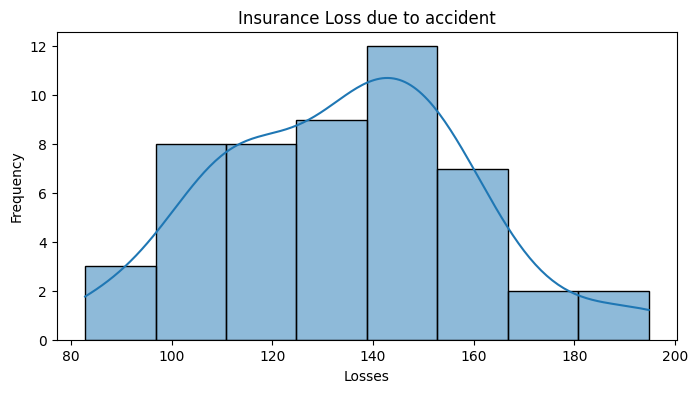

In [140]:
plt.figure(figsize=(8,4))
sns.histplot(data['ins_losses'],bins=8, kde=True)
plt.title('Insurance Loss due to accident')
plt.xlabel('Losses')
plt.ylabel('Frequency')
plt.show()

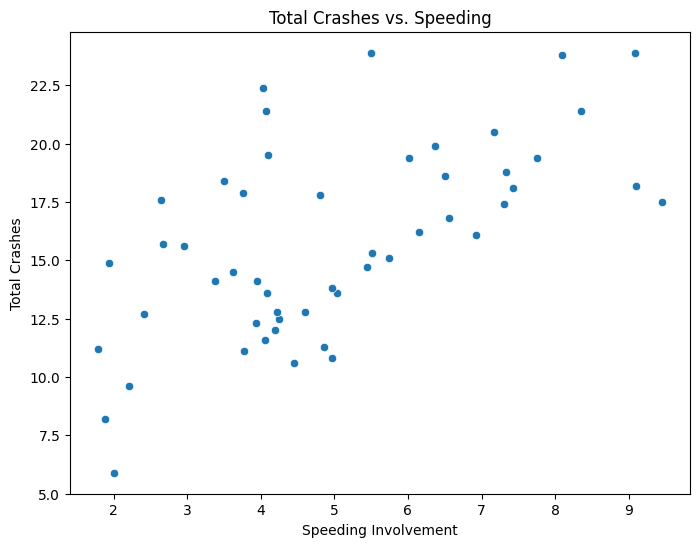

In [120]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='speeding', y='total', data=data)
plt.title('Total Crashes vs. Speeding')
plt.xlabel('Speeding Involvement')
plt.ylabel('Total Crashes')
plt.show()

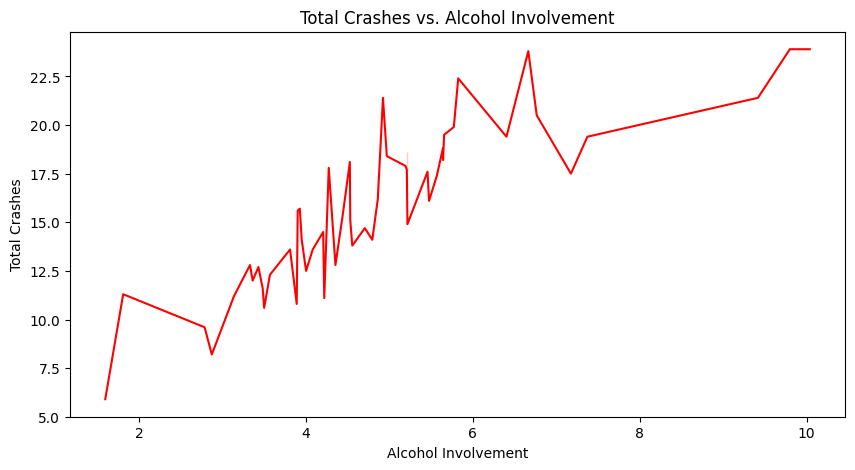

In [121]:
plt.figure(figsize=(10,5))
sns.lineplot(x='alcohol', y='total', data=data, color= "red")
plt.title('Total Crashes vs. Alcohol Involvement')
plt.xlabel('Alcohol Involvement')
plt.ylabel('Total Crashes')
plt.show()

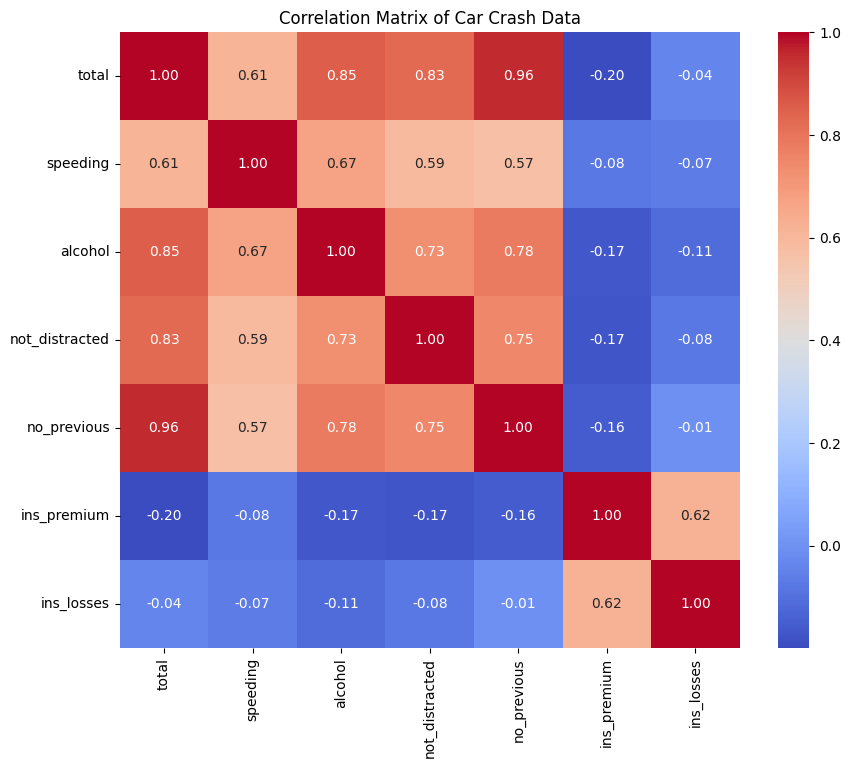

In [122]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr(numeric_only=True) # Calculate correlation for numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Car Crash Data')
plt.show()

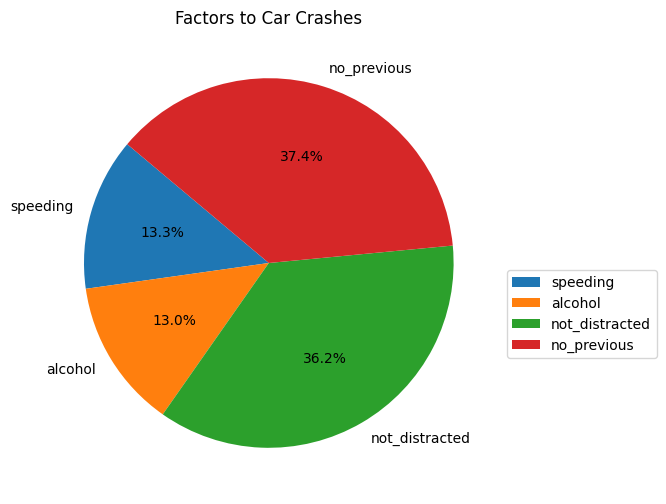

In [125]:
factors = data[['speeding', 'alcohol', 'not_distracted', 'no_previous']].mean()

plt.figure(figsize=(8, 6))
plt.pie(factors, labels= factors.index, autopct='%1.1f%%', startangle=140)
plt.title('Factors to Car Crashes')
plt.legend(bbox_to_anchor=(1,0.5), loc=2)
plt.show()

Text(0, 0.5, 'Count')

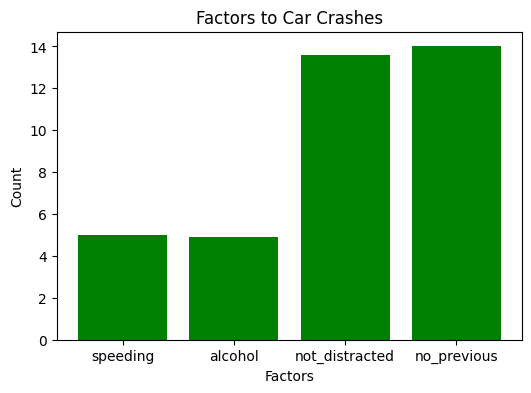

In [138]:
tot=data[['speeding', 'alcohol', 'not_distracted', 'no_previous']].mean()
plt.figure(figsize=(6, 4))
plt.bar(tot.index, tot, color='green')
plt.title('Factors to Car Crashes')
plt.xlabel('Factors')
plt.ylabel('Count')

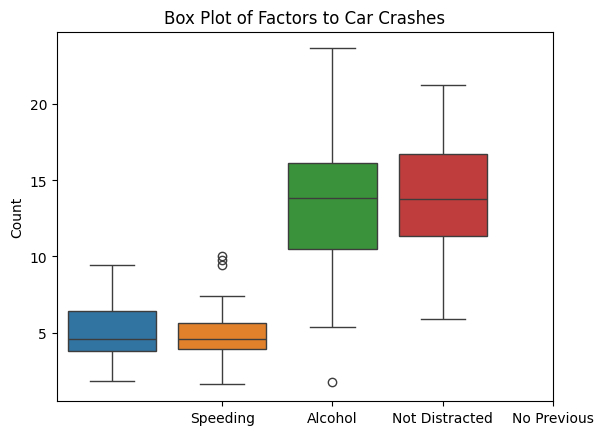

In [159]:
sns.boxplot(data[['speeding', 'alcohol', 'not_distracted', 'no_previous']])
plt.xticks([1, 2, 3, 4], ['Speeding', 'Alcohol', 'Not Distracted', 'No Previous'])
plt.title('Box Plot of Factors to Car Crashes')
plt.ylabel('Count')
plt.show()
plt.show()

In [149]:
Q1 = data['alcohol'].quantile(0.25)
Q3 = data['alcohol'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['alcohol'] < lower_bound) | (data['alcohol'] > upper_bound)]
clean_data= data[(data['alcohol'] >= lower_bound) & (data['alcohol'] <= upper_bound)]
print("Outliers:")
print(outliers)
print()
print("Cleaned Data:")
print(clean_data)

Outliers:
    total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
26   21.4     8.346    9.416          17.976       18.190       816.21   
34   23.9     5.497   10.038          23.661       20.554       688.75   
40   23.9     9.082    9.799          22.944       19.359       858.97   

    ins_losses abbrev  
26       85.15     MT  
34      109.72     ND  
40      116.29     SC  

Cleaned Data:
    total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0    18.8     7.332    5.640          18.048       15.040       784.55   
1    18.1     7.421    4.525          16.290       17.014      1053.48   
2    18.6     6.510    5.208          15.624       17.856       899.47   
3    22.4     4.032    5.824          21.056       21.280       827.34   
4    12.0     4.200    3.360          10.920       10.680       878.41   
5    13.6     5.032    3.808          10.744       12.920       835.50   
6    10.8     4.968    3.888           9.396        8.856      1

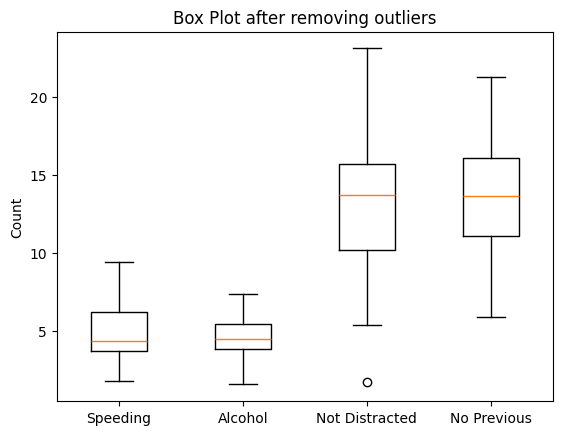

In [155]:
plt.boxplot(clean_data[['speeding', 'alcohol', 'not_distracted', 'no_previous']])
plt.xticks([1, 2, 3, 4], ['Speeding', 'Alcohol', 'Not Distracted', 'No Previous'])
plt.title('Box Plot after removing outliers')
plt.ylabel('Count')
plt.show()